In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from mnist import MNIST
mndata = MNIST('./mnist/', gz=True)
images, labels = mndata.load_training()

Text(0.5,1,'5')

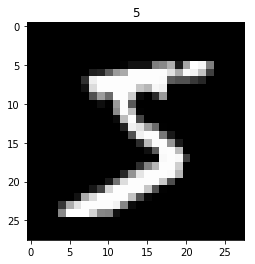

In [4]:
x=np.array(images[0])
plt.imshow(x.reshape((28,28)),cmap='gray')
plt.title(labels[0])

Let's formulate a binary classification problem to be "distinguish 0ths and 8ths".

For that let's create a dataset:

In [4]:
lab=[]
dat=[]

for i in range(len(labels)):
    if labels[i] == 0:
        lab.append(-1)
        dat.append(images[i])
    if labels[i] == 8:
        lab.append(+1)
        dat.append(images[i])

### Classifying 0's vs 8's

In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dat, lab, test_size=0.33, random_state=42)

In [7]:
clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy", accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred, labels=[-1,+1])

Accuracy 0.9855892949047864


array([[1940,   24],
       [  32, 1890]])

### Normalizing the values

In [10]:
def normalize(data):
    for i in range(len(data)):
        data[i] = data[i]/np.linalg.norm(data[i])
    return data

In [11]:
norm_data = normalize(dat)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, lab, test_size=0.33, random_state=42)
clf = LinearSVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred, labels=[-1,+1])

Accuracy 0.9907359752959342


array([[1945,   19],
       [  17, 1905]])

### Multiclass classification using SVM

In [5]:
from sklearn import svm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [ ]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred, labels=[-1,+1])